## Step 1: Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load and preprocess the Iris dataset

In [2]:
def load_dataset():
    # Load the Iris dataset
    iris_data = pd.read_csv('iris.csv')
    
    # Remove the 'Species' column and store it for future comparison
    species = iris_data['Species']
    iris_data = iris_data.drop('Species', axis=1)
    
    # Convert the dataset to a NumPy array
    iris_array = iris_data.values
    
    return iris_array, species

# Load the dataset
iris_array, species = load_dataset()


## Step 3: Implement the K-Means Clustering algorithm

In [3]:
def kmeans_clustering(dataset, k, max_iterations=100):
    # Randomly initialize cluster centroids
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]
    
    for _ in range(max_iterations):
        # Calculate Euclidean distance between each data point and centroids
        distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2)
        
        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=1)
        
        # Update centroids by calculating the mean of each cluster
        new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])
        
        # Check if centroids have converged
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels


## Step 4: Implement the Principal Component Analysis (PCA) algorithm

In [4]:
def pca(dataset, num_components=2):
    # Normalize the dataset
    normalized_dataset = (dataset - dataset.mean(axis=0)) / dataset.std(axis=0)
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(normalized_dataset.T)
    
    # Perform eigendecomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top 'num_components' eigenvectors
    selected_eigenvectors = eigenvectors[:, :num_components]
    
    # Project the dataset onto the selected eigenvectors
    projected_dataset = np.dot(normalized_dataset, selected_eigenvectors)
    
    return projected_dataset, eigenvalues[:num_components]


## Step 5: Visualize the results

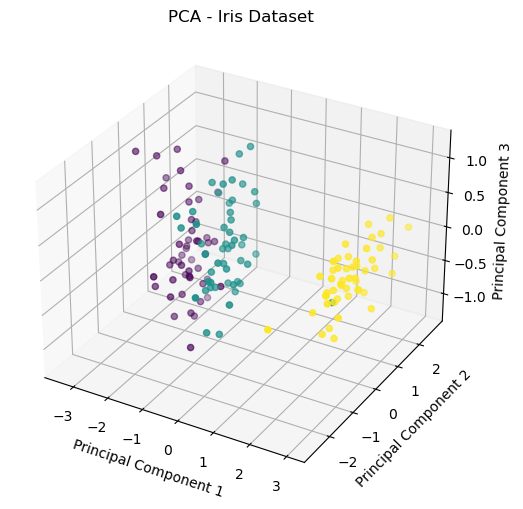

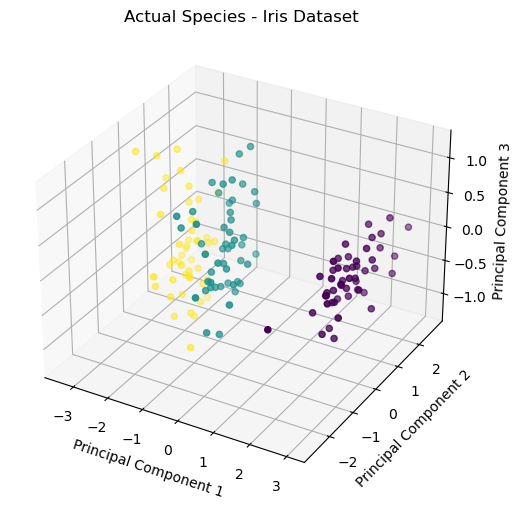

In [5]:
# Perform K-Means Clustering
k = 3  # Number of clusters
cluster_labels = kmeans_clustering(iris_array, k)

# Perform PCA and project the dataset onto the first three eigenvectors
projected_dataset, eigenvalues = pca(iris_array, num_components=3)

# Create a scatter plot of the projected dataset
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_dataset[:, 0], projected_dataset[:, 1], projected_dataset[:, 2], c=cluster_labels)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - Iris Dataset')

plt.show()

# Create a scatter plot of the actual species
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_dataset[:, 0], projected_dataset[:, 1], projected_dataset[:, 2], c=species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Actual Species - Iris Dataset')

plt.show()
